## 코랩 한글

In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 런타임 다시 시작

In [33]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [34]:
import os
import pandas as pd

In [35]:
cctv_csv_path = '/content/drive/MyDrive/경북대 특강/DS/data/01. CCTV_in_Seoul.csv'
pop_xls_path = '/content/drive/MyDrive/경북대 특강/DS/data/01. population_in_Seoul.xls'

In [36]:
cctv_seoul=pd.read_csv(cctv_csv_path)

In [37]:
#cctv_seoul.columns=['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'},inplace=True)

In [38]:
pop_seoul=pd.read_excel(pop_xls_path)

In [39]:
pop_seoul=pd.read_excel(pop_xls_path,header=2,usecols='B,D,G,J,N')

In [40]:
pop_seoul.columns=['구별', '인구수', '한국인', '외국인', '고령자']

In [41]:
#cctv 데이터 확인

In [42]:
cctv_seoul.sort_values(by='소계')

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


#증가율 기준

In [43]:
cctv_seoul['최근증가율']=(((cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/cctv_seoul['2013년도 이전'])*100)
cctv_seoul.sort_values(by='최근증가율',ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [44]:
#합계행, 마지막행 삭제
pop_seoul.drop(axis=0,index=[0,26],inplace=True)
pop_seoul.reset_index(drop=True)

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [45]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [46]:
pop_seoul.isnull()

,구별,인구수,한국인,외국인,고령자
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False


In [47]:
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수']*100

In [48]:
print(len(pop_seoul['구별'].unique()))
print(cctv_seoul)

25
      구별    소계  2013년도 이전  2014년  2015년  2016년       최근증가율
0    강남구  2780       1292    430    584    932  150.619195
1    강동구   773        379     99    155    377  166.490765
2    강북구   748        369    120    138    204  125.203252
3    강서구   884        388    258    184     81  134.793814
4    관악구  1496        846    260    390    613  149.290780
5    광진구   707        573     78     53    174   53.228621
6    구로구  1561       1142    173    246    323   64.973730
7    금천구  1015        674     51    269    354  100.000000
8    노원구  1265        542     57    451    516  188.929889
9    도봉구   485        238    159     42    386  246.638655
10  동대문구  1294       1070     23    198    579   74.766355
11   동작구  1091        544    341    103    314  139.338235
12   마포구   574        314    118    169    379  212.101911
13  서대문구   962        844     50     68    292   48.578199
14   서초구  1930       1406    157    336    398   63.371266
15   성동구  1062        730     91    241    265   81.7

In [49]:
data_result=pd.merge(cctv_seoul,pop_seoul,on='구별')

In [50]:
data_result.drop(columns=['2013년도 이전','2014년','2015년','2016년'],inplace=True)

In [51]:
import numpy as np
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [52]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

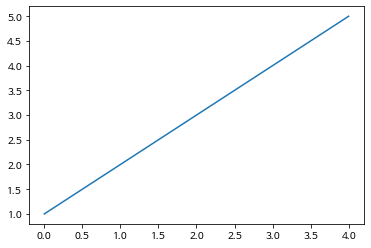

In [53]:
plt.plot([1,2,3,4,5])
plt.show()

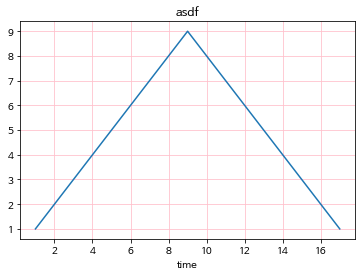

In [54]:
#np.arange=np.array+range
x=np.arange(1,18)
y=[1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
plt.plot(x,y)
plt.grid(color='pink')
plt.xlabel('time')
plt.title('asdf')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


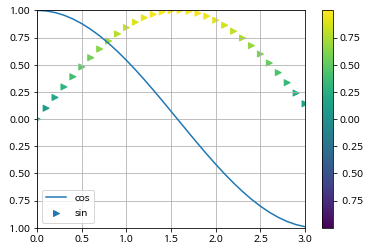

In [55]:
#plt.figure(figsize=(10,6))
t=np.arange(0,10,0.1)
plt.scatter(t,np.sin(t),label='sin',marker='>',c=np.sin(t))
plt.plot(t,np.cos(t),label='cos')
plt.xlim(0,3)
plt.ylim(-1,1)
plt.grid()
plt.legend()
plt.colorbar()
plt.show()

In [ ]:
data_result.set_index(keys=['구별'],drop=True,inplace=True)

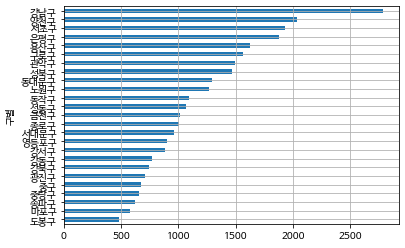

In [58]:
data_result.sort_values(by='소계',inplace=True)
data_result['소계'].plot(kind='barh',grid=True)
plt.show()

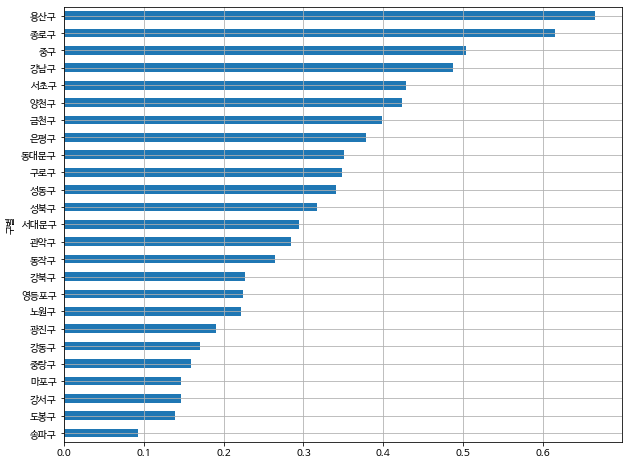

In [63]:
data_result['cctv 비율']=data_result['소계']/data_result['인구수']*100
data_result['cctv 비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,8))
plt.show()

In [ ]:
#numpy polyfit() -> 선형회귀

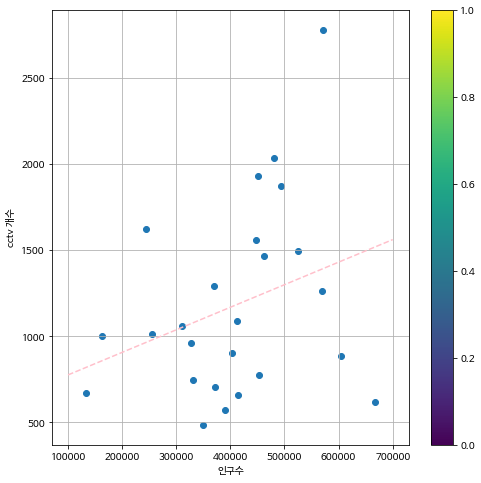

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('cctv 개수')

fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)
plt.plot(fx,f1(fx),ls='dashed',color='pink')

plt.colorbar()
plt.grid()
plt.show()